## 1.4.10 Histograms in OpenCV

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [37]:
img = cv2.imread('cat.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
print(np.transpose(hist))

[[9.700e+01 2.510e+02 2.710e+02 2.320e+02 1.600e+02 1.290e+02 1.020e+02
  1.270e+02 9.100e+01 8.700e+01 1.020e+02 1.040e+02 1.110e+02 1.120e+02
  1.010e+02 1.130e+02 1.170e+02 1.270e+02 1.220e+02 1.290e+02 1.290e+02
  1.230e+02 1.230e+02 1.030e+02 1.300e+02 9.900e+01 8.400e+01 1.010e+02
  1.030e+02 1.100e+02 9.600e+01 1.090e+02 1.180e+02 1.280e+02 1.150e+02
  1.030e+02 1.360e+02 1.570e+02 1.390e+02 1.290e+02 1.590e+02 1.590e+02
  1.740e+02 1.760e+02 2.290e+02 2.050e+02 2.010e+02 2.160e+02 2.490e+02
  2.520e+02 2.570e+02 2.400e+02 2.630e+02 2.680e+02 2.730e+02 2.950e+02
  3.040e+02 3.310e+02 3.310e+02 3.720e+02 4.010e+02 4.260e+02 4.140e+02
  4.520e+02 4.820e+02 4.580e+02 5.020e+02 5.100e+02 5.610e+02 6.060e+02
  6.550e+02 6.610e+02 7.390e+02 7.070e+02 7.390e+02 7.690e+02 7.780e+02
  7.620e+02 8.220e+02 8.810e+02 9.570e+02 9.390e+02 9.380e+02 1.041e+03
  1.128e+03 1.158e+03 1.136e+03 1.230e+03 1.143e+03 1.134e+03 1.200e+03
  1.291e+03 1.183e+03 1.205e+03 1.277e+03 1.185e+03 1.106e+03 1.

In [39]:
hist = np.bincount(img.ravel(),minlength=256)

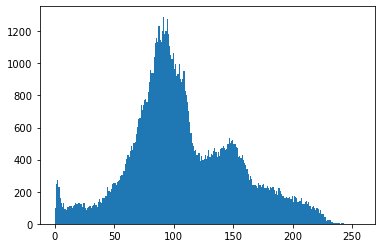

In [40]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

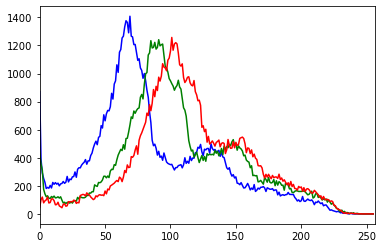

In [41]:
img = cv2.imread('cat.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

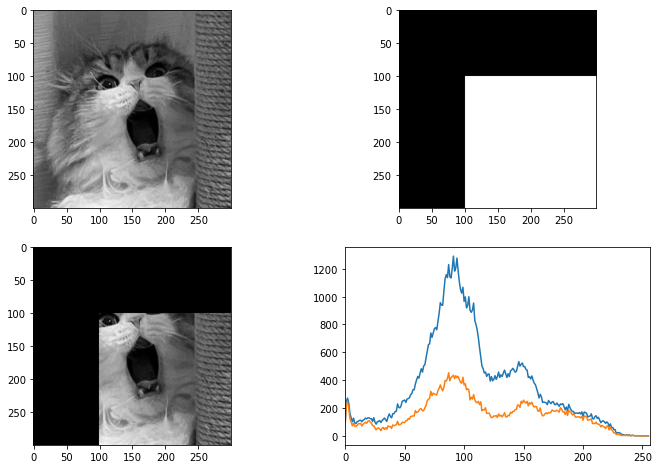

In [42]:
img = cv2.imread('cat.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

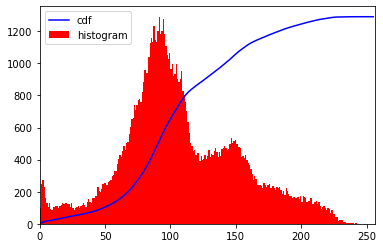

In [43]:
img = cv2.imread('cat.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [44]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m -cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [45]:
img2 = cdf[img]

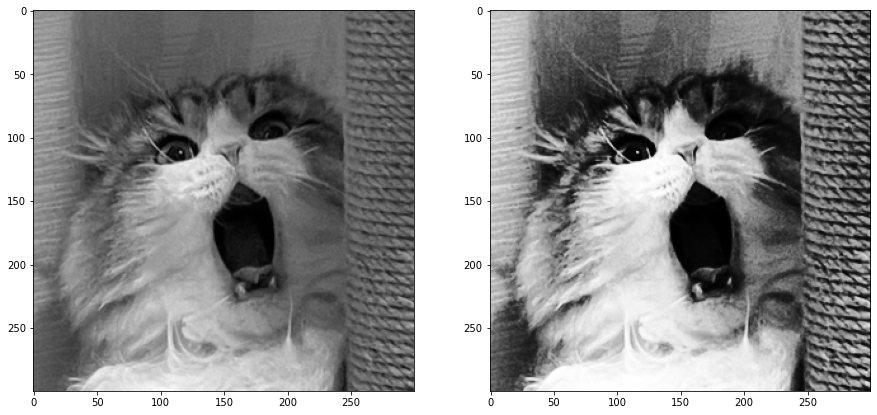

In [46]:
plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(img,'gray')
plt.subplot(122), plt.imshow(img2,'gray')
plt.show()

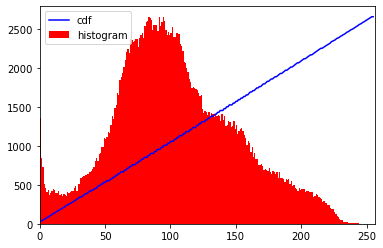

In [15]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [47]:
img = cv2.imread('cat.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
cv2.imwrite('cat.jpg',res)

True

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [53]:
img = cv2.imread('dog.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('clahe_2.jpg',cl1)

True

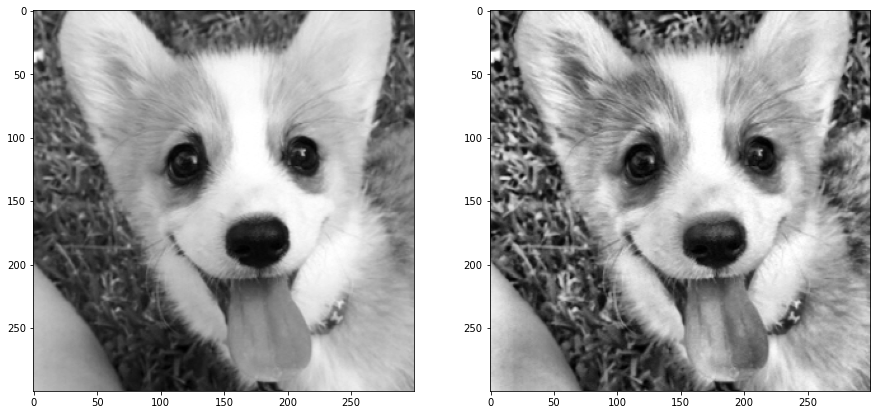

In [54]:
plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(img,'gray')
plt.subplot(122), plt.imshow(cl1,'gray')
plt.show()

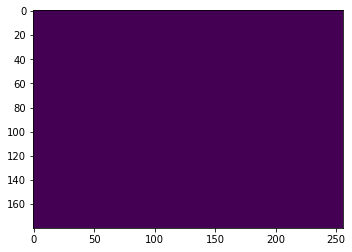

In [52]:
img = cv2.imread('cat.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()